## Imports

In [81]:
import sys
import math
import heapq as hq
from collections import defaultdict


from graphviz import Digraph

## Graph

In [40]:
class Graph:
    def __init__(self, edges, directed=False):
        self.directed = directed
        self._vertices = set()
        self.num_vertices = 0
        self.num_edges = 0
        self.edges = defaultdict(list)
        for edge in edges:
            self.insert_edge(edge)
            
    def insert_edge(self, edge):
        u, v, w = edge
        self._vertices.add(u)
        self._vertices.add(v)
        self.edges[u].append((v, w))
        if not self.directed:
            self.edges[v].append((u, w))
        self.num_vertices = len(self._vertices)
        
    def visualize(self):
        graph = Digraph(engine="sfdp")
        for p_vertex in self.edges:
            graph.node(str(p_vertex))
            for (c_vertex, weight) in self.edges[p_vertex]:
                graph.node(str(c_vertex))
                graph.edge(str(p_vertex), str(c_vertex), label=str(weight))
        
        return graph
        
    def __str__(self):
        out_str = ""
        for p_vertex, children in self.edges.items():
            p_str = "{} :".format(p_vertex)
            for c_vertex, weight in children:
                p_str += "({}, {}) ".format(c_vertex, weight)
            out_str += p_str + "\n"
        
        return out_str

## Prim's Algorithm

In [3]:
def prim(graph, start=None):
    if start is None:
        start = next(iter(graph.edges))
    visited = [False] * len(graph.edges)
    distances = [(0, start)]
    total_weight = 0
    while distances:
        weight, vertex = hq.heappop(distances)
        if not visited[vertex]:
            visited[vertex] = True
            total_weight += weight
            for vertex, weight in graph.edges[vertex]:
                hq.heappush(distances, (weight, vertex))
    return total_weight

In [4]:
g = Graph(
    [(0, 1, 5), (0, 2, 7), (0, 3, 12), (1, 4, 7), (4, 5, 2), (1, 2, 9), (3, 2, 4), (4, 2, 4), (3, 5, 7), (5, 2, 3), (5, 6, 2), (4, 6, 5)]
)

In [5]:
minimum_total_weight = prim(g, start=0)

In [6]:
minimum_total_weight

23

## Kruskal's Algorithm

In [7]:
class UnionFind:
    def __init__(self, nodes):
        self.nodes = nodes
        self.num_components = len(self.nodes)
        self.sizes = [1] * len(self.nodes)
        
    def find(self, x):
        parent = self.nodes[x]
        while parent != self.nodes[parent]:
            parent = self.nodes[parent]
        self.nodes[x] = parent
        
        return parent
    
    def union(self, x, y):
        p_x, p_y = self.find(x), self.find(y)
        if p_x != p_y:
            if self.sizes[p_x] < self.sizes[p_y]:
                self.nodes[p_x] = p_y
                self.sizes[p_y] += self.sizes[p_x]
                self.num_components -= 1
            else:
                self.nodes[p_y] = p_x
                self.sizes[p_x] += self.sizes[p_y]
                self.num_components -= 1

In [8]:
def kruskal(graph):
    total_cost = 0
    MST_edges = []
    edges = []
    union_find = UnionFind(list(range(len(graph.edges))))
    for p_vertex in graph.edges:
        for (c_vertex, weight) in graph.edges[p_vertex]:
            hq.heappush(edges, (weight, p_vertex, c_vertex))
    while edges:
        weight, p_vertex, c_vertex = hq.heappop(edges)
        if union_find.find(p_vertex) != union_find.find(c_vertex):
            MST_edges.append((p_vertex, c_vertex))
            total_cost += weight
            union_find.union(p_vertex, c_vertex)
    
    return total_cost, MST_edges

In [9]:
g = Graph(
    [(0, 1, 5), (0, 2, 7), (0, 3, 12), (1, 4, 7), (4, 5, 2), (1, 2, 9), (3, 2, 4), (4, 2, 4), (3, 5, 7), (5, 2, 3), (5, 6, 2), (4, 6, 5)]
)

In [10]:
minimum_total_weight, MST_edges = kruskal(g)

In [11]:
minimum_total_weight

23

In [12]:
MST_edges

[(4, 5), (5, 6), (2, 5), (2, 3), (0, 1), (0, 2)]

## Dijkstra's Algorithm

In [57]:
def dijkstra(graph, start=None):
    if start is None:
        start = next(iter(graph.edges))
    visited = set()
    edges = []
    edges.append((0, start, start))
    distances = {i: [sys.maxsize, -1] for i in range(len(graph.edges))}
    distances[start] = [0, -1]
    while edges:
        weight, p_vertex, c_vertex = hq.heappop(edges)
        dist = distances[p_vertex][0]
        if weight + dist < distances[c_vertex][0]:
            distances[c_vertex] = [weight + dist, p_vertex]
        if c_vertex not in visited:
            visited.add(c_vertex)
            for g_vertex, weight in graph.edges[c_vertex]:
                hq.heappush(edges, (weight, c_vertex, g_vertex))
    
    return distances

In [58]:
g = Graph(
    [(0, 1, 5), (0, 2, 7), (0, 3, 12), (1, 4, 7), (4, 5, 2), (1, 2, 9), (3, 2, 4), (4, 2, 4), (3, 5, 7), (5, 2, 3), (5, 6, 2), (4, 6, 5)]
)

In [59]:
distances = dijkstra(g)

In [60]:
distances

{0: [0, -1],
 1: [5, 0],
 2: [7, 0],
 3: [11, 2],
 4: [11, 2],
 5: [10, 2],
 6: [12, 5]}

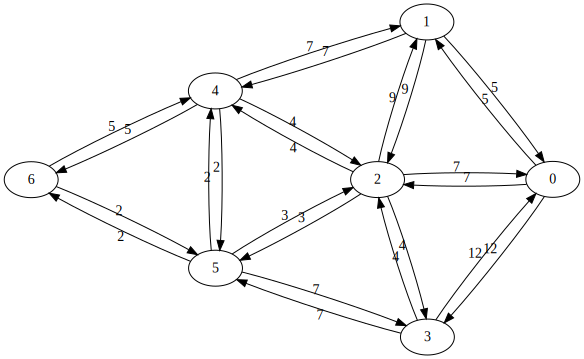

In [61]:
g.visualize()

## Floyd-Warshall Algorithm

In [71]:
def floyd(graph):
    adj_matrix = [[sys.maxsize] * len(graph.edges) for _ in range(len(graph.edges))]
    for p_vertex in graph.edges:
        for (c_vertex, weight) in graph.edges[p_vertex]:
            adj_matrix[p_vertex][c_vertex] = weight
    for i in range(len(adj_matrix)):
        adj_matrix[i][i] = 0
    
    for k in range(len(adj_matrix)):
        for i in range(len(adj_matrix)):
            for j in range(len(adj_matrix)):
                sum_path = adj_matrix[i][k] + adj_matrix[k][j]
                if sum_path < adj_matrix[i][j]:
                    adj_matrix[i][j] = sum_path
    
    return adj_matrix

In [72]:
g = Graph(
    [(0, 1, 5), (0, 2, 7), (0, 3, 12), (1, 4, 7), (4, 5, 2), (1, 2, 9), (3, 2, 4), (4, 2, 4), (3, 5, 7), (5, 2, 3), (5, 6, 2), (4, 6, 5)]
)

In [73]:
adj_matrix = floyd(g)

In [74]:
adj_matrix

[[0, 5, 7, 11, 11, 10, 12],
 [5, 0, 9, 13, 7, 9, 11],
 [7, 9, 0, 4, 4, 3, 5],
 [11, 13, 4, 0, 8, 7, 9],
 [11, 7, 4, 8, 0, 2, 4],
 [10, 9, 3, 7, 2, 0, 2],
 [12, 11, 5, 9, 4, 2, 0]]

## Bellman-Ford Algorithm

In [101]:
def bellman_ford(graph, start=None):
    if start is None:
        start = next(iter(graph.edges))
    distances = [sys.maxsize] * graph.num_vertices
    distances[start] = 0
    for i in range(len(graph.edges)):
        for p_vertex in graph.edges:
            for (c_vertex, weight) in graph.edges[p_vertex]:
                if distances[p_vertex] + weight < distances[c_vertex]:
                    distances[c_vertex] = distances[p_vertex] + weight
    for i in range(len(graph.edges)):
        for p_vertex in graph.edges:
            for (c_vertex, weight) in graph.edges[p_vertex]:
                if distances[p_vertex] + weight < distances[c_vertex]:
                    distances[c_vertex] = -math.inf
    
    return distances

In [107]:
g = Graph(
    [(0, 1, -3), (2, 0, -10), (0, 3, 12), (1, 4, 7), (4, 5, 2), (1, 2, 9), (3, 2, 4), (4, 2, 4), (3, 5, 7), (5, 2, 3), (5, 6, 2), (4, 6, 5)],
    directed=True
)

In [108]:
distances = bellman_ford(g)
print(distances)

[-inf, -inf, -inf, -inf, -inf, -inf, -inf]


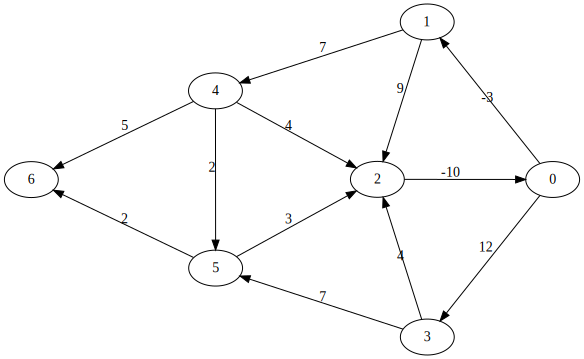

In [109]:
g.visualize()